In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[2]

In [6]:
single_image.shape

(28, 28)

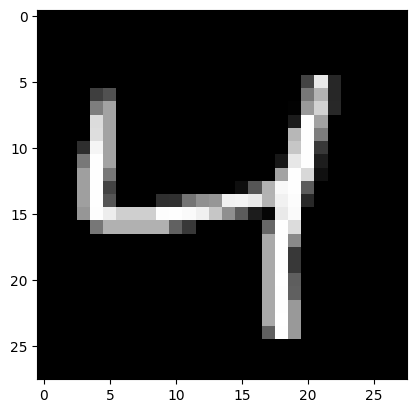

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[2]

4

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

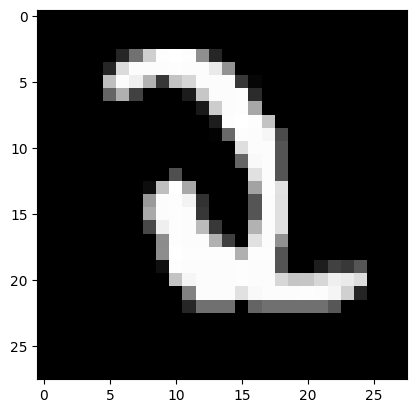

In [18]:
single_image = X_train[400]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[200]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [71]:
model = keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters =32 , kernel_size =(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [72]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [73]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,batch_size=40, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1786 - accuracy: 0.9475 - val_loss: 0.0678 - val_accuracy: 0.9783
Epoch 2/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0489 - val_accuracy: 0.9843
Epoch 3/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0454 - val_accuracy: 0.9844
Epoch 4/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0542 - val_accuracy: 0.9826
Epoch 5/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0468 - val_accuracy: 0.9849
Epoch 6/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0488 - val_accuracy: 0.9855
Epoch 7/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0457 -

In [74]:
metrics = pd.DataFrame(model.history.history)

In [75]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.178625,0.947517,0.067794,0.9783
1,0.059781,0.981967,0.048946,0.9843
2,0.040614,0.987300,0.045392,0.9844
3,0.028569,0.991283,0.054174,0.9826
4,0.020917,0.993283,0.046833,0.9849


Sudharshna Lakshmi S 212221230110


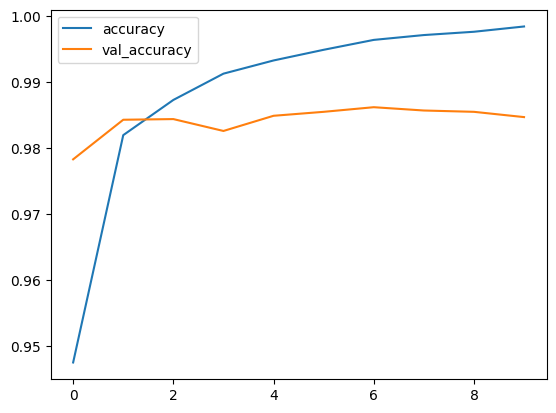

In [89]:
metrics[['accuracy','val_accuracy']].plot()
print("Sudharshna Lakshmi S 212221230110")


Sudharshna Lakshmi S 212221230110


<Axes: >

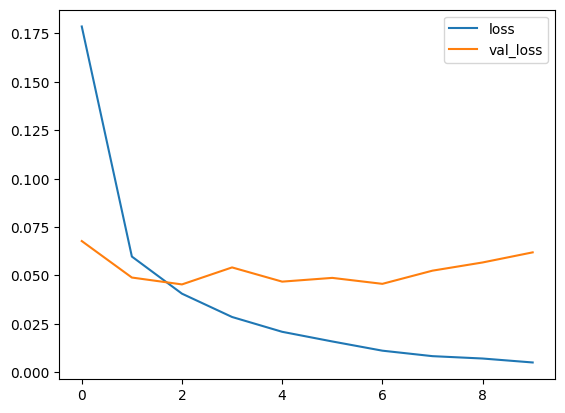

In [90]:
print("Sudharshna Lakshmi S 212221230110")

metrics[['loss','val_loss']].plot()

In [91]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 10ms/step


In [92]:
print("Sudharshna Lakshmi S 212221230110")
print(confusion_matrix(y_test,x_test_predictions))

Sudharshna Lakshmi S 212221230110
[[ 975    0    0    2    1    0    2    0    0    0]
 [   0 1132    2    0    0    0    0    0    1    0]
 [   2    4 1013    0    2    0    1    5    4    1]
 [   1    0    1 1000    0    3    0    0    4    1]
 [   0    1    0    0  962    0    0    0    0   19]
 [   1    0    1    8    0  873    7    0    1    1]
 [   6    3    2    0    1    3  940    0    3    0]
 [   1    1   10    0    0    0    0 1002    3   11]
 [   6    0    2    2    0    1    0    3  949   11]
 [   1    0    0    0    3    1    0    3    0 1001]]


In [93]:
print("Sudharshna Lakshmi S 212221230110")
print(classification_report(y_test,x_test_predictions))

Sudharshna Lakshmi S 212221230110
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [94]:
img = image.load_img("/content/3.png")

In [95]:
type(img)

PIL.Image.Image

Sudharshna Lakshmi S 212221230110


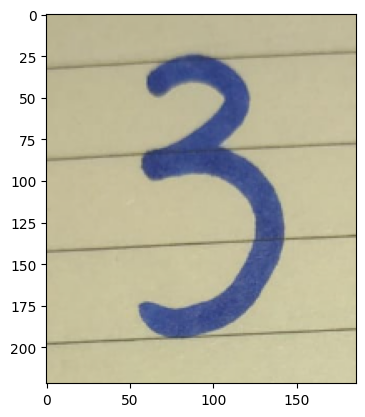

In [100]:
print("Sudharshna Lakshmi S 212221230110")
img = image.load_img('/content/3.png')
plt.imshow(img)
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [102]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [103]:
print("Sudharshna Lakshmi S 212221230110")
print(x_single_prediction)

Sudharshna Lakshmi S 212221230110
[3]


Sudharshna Lakshmi S 212221230110


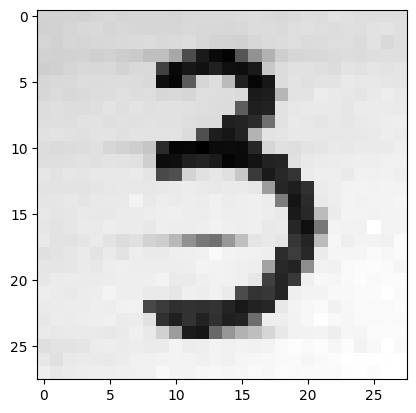

In [104]:
print("Sudharshna Lakshmi S 212221230110")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')